In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
import numpy as np
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('default of credit card clients-2.csv', index_col=0)

In [3]:
df.rename(columns={'default payment next month': 'default'}, inplace=True)

In [4]:
df.to_csv('credit.csv', index=False)

In [5]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [6]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [7]:
# very clean
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [8]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

In [9]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


0    23364
1     6636
Name: default, dtype: int64


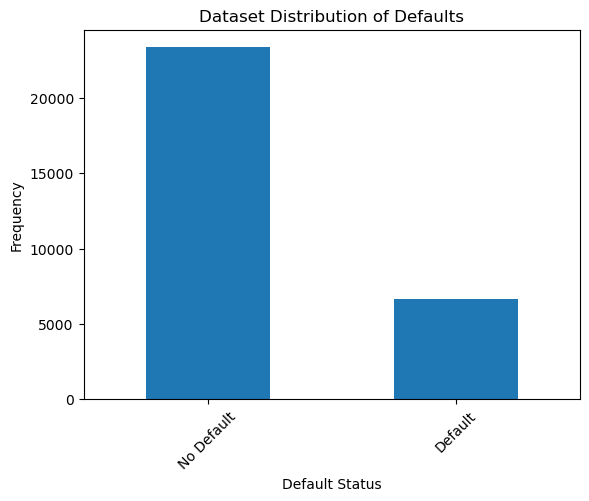

In [24]:
# Imbalanced, We should probably get an even split when training
df['default'].value_counts().plot.bar()
plt.xticks([0,1], ['No Default', 'Default'], rotation=45)
#plt.xticks
plt.xlabel('Default Status')
plt.ylabel('Frequency')
plt.title('Dataset Distribution of Defaults')

print(df['default'].value_counts())

In [11]:
# Balance the df
balanced_df = pd.concat([df[df['default'] == 0].sample(6636, random_state=42), df[df['default'] == 1]]).reset_index(drop=True)

<AxesSubplot:>

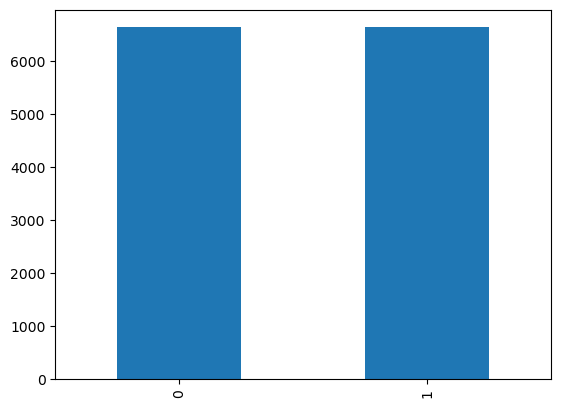

In [12]:
balanced_df['default'].value_counts(()).plot.bar()

In [13]:
balanced_df.to_csv('balanced_credit.csv', index=False)

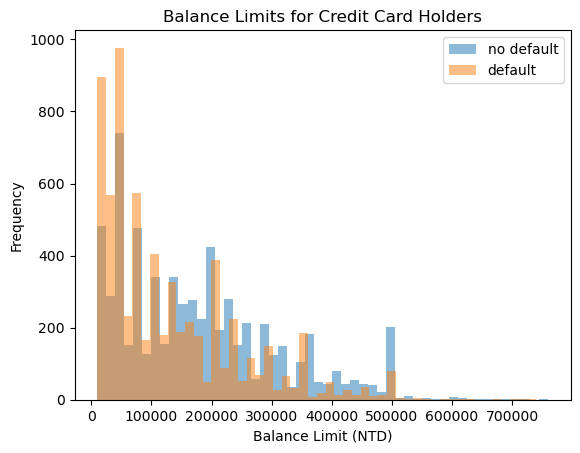

In [14]:
plt.hist(x=balanced_df[balanced_df['default'] == 0].LIMIT_BAL, bins=50, alpha=0.5, label='no default');
plt.hist(x=balanced_df[balanced_df['default'] == 1].LIMIT_BAL, bins=50, alpha=0.5, label='default');
plt.xlabel('Balance Limit (NTD)')
plt.ylabel('Frequency')
plt.title('Balance Limits for Credit Card Holders')
plt.legend()
plt.show()

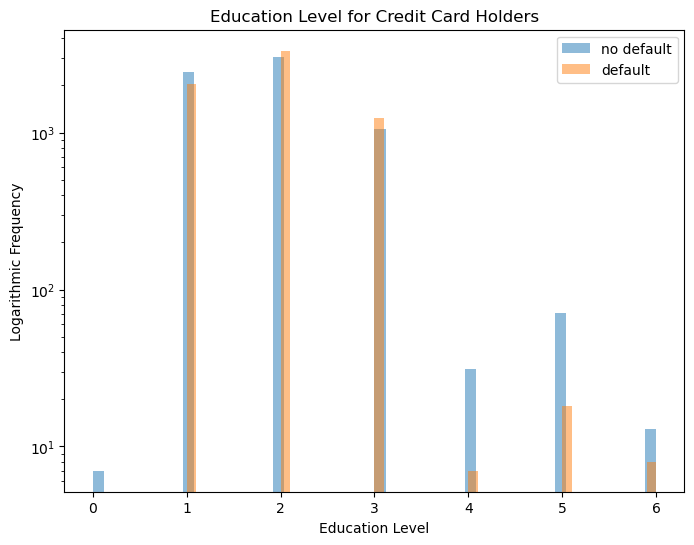

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(x=balanced_df[balanced_df['default'] == 0].EDUCATION, bins=50, alpha=0.5, label='no default');
ax.hist(x=balanced_df[balanced_df['default'] == 1].EDUCATION, bins=50, alpha=0.5, label='default');
plt.xlabel('Education Level')
plt.ylabel('Logarithmic Frequency')
plt.title('Education Level for Credit Card Holders')
ax.set_yscale('log')
plt.legend()
plt.show()


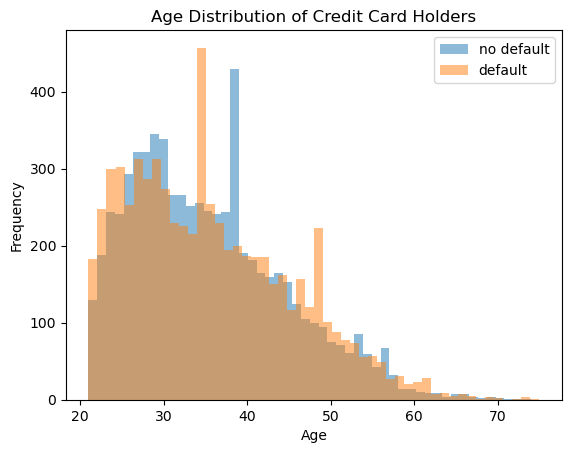

In [25]:
plt.hist(x=balanced_df[balanced_df['default'] == 0].AGE, bins=50, alpha=0.5, label='no default');
plt.hist(x=balanced_df[balanced_df['default'] == 1].AGE, bins=50, alpha=0.5, label='default');
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Credit Card Holders')
plt.legend()
plt.show()

In [17]:
balanced_df[balanced_df['default'] == 0].mean()

LIMIT_BAL    178083.182640
SEX               1.609855
EDUCATION         1.839060
MARRIAGE          1.562086
AGE              35.524111
PAY_0            -0.204641
PAY_2            -0.298222
PAY_3            -0.306811
PAY_4            -0.345841
PAY_5            -0.389542
PAY_6            -0.402652
BILL_AMT1     52997.337703
BILL_AMT2     50450.880350
BILL_AMT3     48631.310880
BILL_AMT4     44708.990958
BILL_AMT5     41148.971971
BILL_AMT6     39688.914406
PAY_AMT1       6040.742315
PAY_AMT2       6930.307565
PAY_AMT3       5927.747137
PAY_AMT4       5219.224382
PAY_AMT5       5291.487492
PAY_AMT6       5685.663954
default           0.000000
dtype: float64

In [18]:
balanced_df[balanced_df['default'] == 1].mean()

LIMIT_BAL    130109.656420
SEX               1.567058
EDUCATION         1.894665
MARRIAGE          1.528029
AGE              35.725738
PAY_0             0.668174
PAY_2             0.458258
PAY_3             0.362116
PAY_4             0.254521
PAY_5             0.167872
PAY_6             0.112116
BILL_AMT1     48509.162297
BILL_AMT2     47283.617842
BILL_AMT3     45181.598855
BILL_AMT4     42036.950573
BILL_AMT5     39540.190476
BILL_AMT6     38271.435503
PAY_AMT1       3397.044153
PAY_AMT2       3388.649638
PAY_AMT3       3367.351567
PAY_AMT4       3155.626733
PAY_AMT5       3219.139542
PAY_AMT6       3441.482068
default           1.000000
dtype: float64

In [19]:
scale(balanced_df, axis=0, with_std=True, with_mean=True)

array([[ 1.79063373,  0.83627734,  1.47322014, ...,  0.68337391,
         0.85795981, -1.        ],
       [ 0.68091815,  0.83627734,  0.17309528, ..., -0.00923723,
         0.0240546 , -1.        ],
       [-0.82512442,  0.83627734, -1.12702957, ..., -0.30633796,
        -0.29008212, -1.        ],
       ...,
       [-0.98365521, -1.19577555,  0.17309528, ..., -0.16235893,
        -0.09303157,  1.        ],
       [-0.58732822, -1.19577555,  1.47322014, ...,  3.50651481,
        -0.17541141,  1.        ],
       [-0.82512442, -1.19577555,  0.17309528, ..., -0.23434845,
        -0.22651743,  1.        ]])